In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import time
import seaborn as sns
import pickle
import numpy as np

In [2]:
model_file = "../../models/RandomForest_2"
data_file = "../../data/processed_data_1.csv"

In [3]:
data = pd.read_csv(data_file)
# Process type  ( Apartment: 0, Independent House: 1, Studio Apartment: 2, villa: 3 )
# Process status ( Ready to move: 0, under Construction: 1 )
data = data[data['age'] != 2]
# for column in data:
#     if column in ["bhk","status","house_type","new"]:
#         # Get the value counts for the column
#         value_counts = data[column].value_counts()
#         # Find the values that occur fewer than 10 times
#         to_drop = value_counts[value_counts < 10].index
#         # Drop rows where the column's value is in the to_drop list
#         data = data[~data[column].isin(to_drop)]
for column in data:
    if column in ["bhk","status","house_type","new","age"]:
        print("Column Name: ", column)
        print(data[column].unique())
        print(data[column].value_counts())

Column Name:  bhk
[ 3  2  5  1  4  6  9  8 10  7]
bhk
2     26563
1     22136
3     10426
4      1890
5       316
6        72
7        14
8         5
9         4
10        3
Name: count, dtype: int64
Column Name:  status
[0 1]
status
0    34648
1    26781
Name: count, dtype: int64
Column Name:  age
[0 1]
age
0    38072
1    23357
Name: count, dtype: int64


In [4]:
def preprocessing(data:pd.DataFrame) -> pd.DataFrame:
    # data.drop(["status","new","house_type"], axis = 1, inplace = True)
    data = data.dropna()
    return data

In [5]:
processed_data = preprocessing(data)
for column in processed_data:
    print(column)

bhk
type
locality
area
region
status
age
price_in_USD


In [6]:
X = processed_data.drop(labels="price_in_USD",axis=1)
Y = processed_data["price_in_USD"]

# scaler = StandardScaler()
# X = scaler.fit_transform(X)

print(X.shape)
print(Y.shape)

(61429, 7)
(61429,)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(15, 30, 1),'max_features': [None, 'sqrt','log2']}
def hypersearch(model, model_name, param_grid, X_train, Y_train, scoring='r2'):
    # Hyperparameter tuning
    rs = GridSearchCV(model, param_grid, cv=4,n_jobs=-1, scoring=scoring, return_train_score=True)
    rs.fit(X_train, Y_train)
    best_model = rs.best_estimator_

    #add the report about best hyperparameter of the model to dataframe
    result = pd.DataFrame(rs.cv_results_)
    result.sort_values('rank_test_score', inplace=True)
    result = result[['params', 'mean_fit_time', 'mean_score_time', 'mean_test_score', 'mean_train_score']]
    display(result)
    
    pickle.dump(best_model, open(model_name, 'wb'))
    return best_model

model = hypersearch(RandomForestRegressor(random_state=42), model_file, param_grid, X_train, Y_train)

,params,mean_fit_time,mean_score_time,mean_test_score,mean_train_score
39,"{'max_depth': 28, 'max_features': None}",17.472577,0.427288,0.859977,0.981125
42,"{'max_depth': 29, 'max_features': None}",15.512008,0.291449,0.859677,0.981112
36,"{'max_depth': 27, 'max_features': None}",15.696656,0.486838,0.859539,0.980950
30,"{'max_depth': 25, 'max_features': None}",14.757288,0.347629,0.859018,0.980866
21,"{'max_depth': 22, 'max_features': None}",13.443480,0.326616,0.858989,0.979891
27,"{'max_depth': 24, 'max_features': None}",15.353306,0.348707,0.858800,0.980657
33,"{'max_depth': 26, 'max_features': None}",14.611974,0.349962,0.858481,0.980975
24,"{'max_depth': 23, 'max_features': None}",13.946050,0.328287,0.858470,0.980211
15,"{'max_depth': 20, 'max_features': None}",12.451563,0.270232,0.858445,0.978389
18,"{'max_depth': 21, 'max_features': None}",12.917742,0.295461,0.857748,0.979284


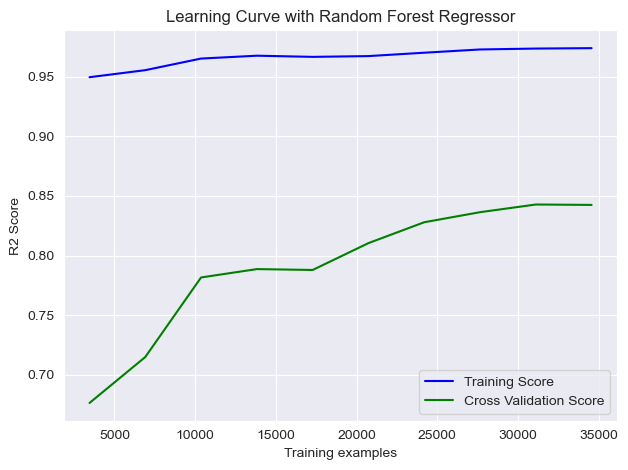

In [19]:
from sklearn.model_selection import learning_curve

# Calculate accuracy on training and test set using the
# gamma parameter with 4-fold cross validation
train_sizes, train_score, val_score = learning_curve(RandomForestRegressor(n_estimators=10,max_depth=28,max_features=None, random_state=42), X_train, Y_train,
                                          cv=4, train_sizes=np.linspace(0.1, 1.0, 10),scoring="r2")

train_score_mean = np.mean(train_score, axis=1)
train_score_std = np.std(train_score, axis=1)

val_score_mean = np.mean(val_score, axis=1)
val_score_std = np.std(val_score, axis=1)

plt.plot(train_sizes, train_score_mean,
         label="Training Score", color='b')
plt.plot(train_sizes, val_score_mean,
         label="Cross Validation Score", color='g')
# Creating the plot
plt.title("Learning Curve with Random Forest Regressor")
plt.xlabel("Training examples")
plt.ylabel("R2 Score")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

In [10]:
# start = time.time()
# # Create the model
# model = RandomForestRegressor(n_estimators=10, max_depth=20 , random_state=42)
# print("Start training...")
# model.fit(X_train, Y_train)
# end = time.time()
# print("Time execution : ", end - start)
# pickle.dump(model, open(model_file, 'wb'))

In [11]:
loaded_model = pickle.load(open(model_file, 'rb'))

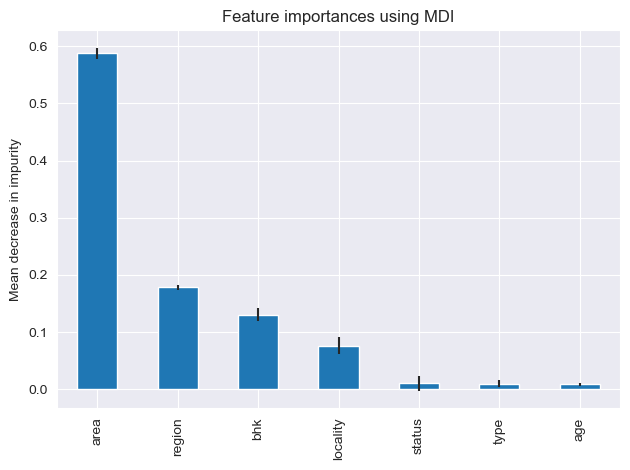

In [12]:
feature_names = [f"{column}" for column in X_train]
importances = loaded_model.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in loaded_model.estimators_], axis=0)
sorted_importances = forest_importances.sort_values(ascending=False)
fig, ax = plt.subplots()
sorted_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [13]:
#Make the predictions 
Y_pred = loaded_model.predict(X_test)
pred_table = pd.DataFrame(data={"actual value":Y_test, "predicted":loaded_model.predict(X_test)})
pred_table["difference"] = pred_table["actual value"] - pred_table["predicted"]
pred_table

,actual value,predicted,difference
11237,36000.0,36763.343648,-763.343648
71941,19812.0,19700.310000,111.690000
49651,83640.0,80543.430747,3096.569253
54393,77988.0,85355.357714,-7367.357714
55831,538800.0,538800.000000,0.000000
...,...,...,...
6107,115380.0,111968.179026,3411.820974
10345,198000.0,202168.997665,-4168.997665
32202,236400.0,210075.200000,26324.800000
22542,132000.0,172456.820112,-40456.820112


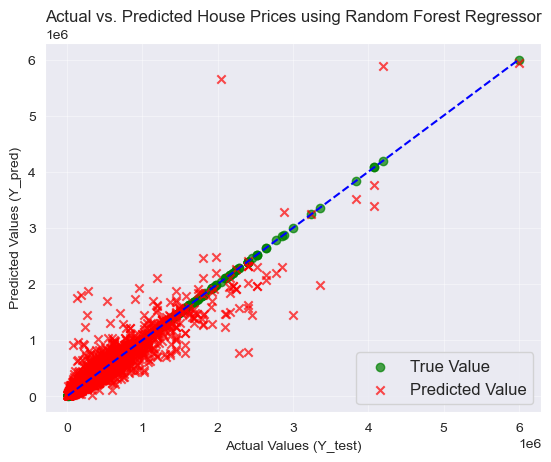

In [14]:
# Assuming you have obtained Y_pred and Y_test from your model

# Create a scatter plot or line plot
# Scatter plot for Y_test (green)
plt.scatter(Y_test, Y_test, c='green', marker='o', label='True Value', alpha=0.7)

# Scatter plot for Y_pred (red)
plt.scatter(Y_test, Y_pred, c='red', marker='x', label='Predicted Value', alpha=0.7)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'b--')  # Diagonal line for reference
plt.xlabel('Actual Values (Y_test)')
plt.ylabel('Predicted Values (Y_pred)')
plt.legend(fontsize=12)
plt.title('Actual vs. Predicted House Prices using Random Forest Regressor')
plt.grid(alpha=0.4)
# Show the plot
plt.show()

In [15]:
from sklearn.metrics import r2_score
#Test the model
pred_train = loaded_model.predict(X_train)
pred_test = loaded_model.predict(X_test)
train_accuracy = r2_score(pred_train, Y_train)
test_accuracy = r2_score(pred_test, Y_test)
print('Training r2 score: ',train_accuracy)
print('Test r2 score: ',test_accuracy)

Training r2 score:  0.9822948788545613
Test r2 score:  0.8876947640638573


In [16]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(Y_train, pred_train)
mse_test = mean_squared_error(Y_test, pred_test)
print('Training mean squared error: ', mse_train)
print('Test mean squared error: ', mse_test)

Training mean squared error:  1123867942.5883765
Test mean squared error:  6098443125.3184805


In [17]:
from sklearn.metrics import mean_absolute_error
mae_train = mean_absolute_error(Y_train, pred_train)
mae_test = mean_absolute_error(Y_test, pred_test)
print('Training mean absolute error: ', mae_train)
print('Test mean absolute error: ', mae_test)

Training mean absolute error:  10085.078167100291
Test mean absolute error:  23528.12757076099
